<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/ESAA_YB_mini_project_final_code_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 및 데이터**

In [ ]:
# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print("한글 폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_train.csv')

# **2. 탐색적 자료 분석**

**column: 제목, 배급사, 장르, 개봉일, 상영 시간, 상영 등급, 감독, dir_prev_bfnum, dir_prev_num, 스태프 수, 주연배우 수, 박스오피스 수**

- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

In [ ]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.shape

(600, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


### 2-1. 데이터 전처리: num_staff

num_staff가 max였던 영화: 스태프가 많이 필요했던 영화.

num_staff가 0인 영화: box_off_num(관객 수)가 크지 않음. 독립 영화 같음.

**num_staff max와 0 모두 그대로 두기.**

In [ ]:
# num_staff가 max였던 영화
train.loc[train.num_staff.idxmax()]

,372
title,국제시장
distributor,CJ 엔터테인먼트
genre,드라마
release_time,2014-12-17
time,126
screening_rat,12세 관람가
director,윤제균
dir_prev_bfnum,NaN
dir_prev_num,0
num_staff,869


In [ ]:
# num_staff가 0인 영화
train[train.num_staff==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079
22,원령,조이앤시네마,공포,2015-08-13,91,15세 관람가,동지견,NaN,0,0,1,914
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
75,원 오브 어 카인드 3D,골든타이드픽처스,뮤지컬,2013-10-31,93,전체 관람가,손석,NaN,0,0,1,8083
87,먹이사슬,노바엔터테인먼트,멜로/로맨스,2014-09-17,100,청소년 관람불가,한동호,NaN,0,0,6,2070
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.00,1,0,3,4122
125,하쿠나 마타타 - 지라니 이야기,이모션 픽처스,다큐멘터리,2010-12-09,90,전체 관람가,이창규,NaN,0,0,6,1253
173,법정스님의 의자,(주)키노아이,다큐멘터리,2011-05-12,75,전체 관람가,임성구,NaN,0,0,2,9438
191,꾸루꾸루와 친구들: 무지개 나무의 비밀,(주)팝엔터테인먼트,애니메이션,2015-11-19,74,전체 관람가,문제대,NaN,0,0,4,7408


### 2-2. 데이터 전처리: num_actor

num_actor가 max였던 영화: 주연 배우가 많이 필요했을 것 같은 영화.

num_actor가 0인 영화: 대부분 다큐멘터리. 주연 배우가 필요하지 않음.

**num_num max와 0 모두 그대로 두기.**

In [ ]:
# num_actor가 max였던 영화
train.loc[train.num_actor.idxmax()]

,80
title,바비
distributor,(주) 케이알씨지
genre,드라마
release_time,2010-02-04
time,116
screening_rat,15세 관람가
director,에밀리오 에스테베즈
dir_prev_bfnum,NaN
dir_prev_num,0
num_staff,19


In [ ]:
# num_actor기 0인 영화
train[train.num_actor==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,NaN,0,6,0,652
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,NaN,0,11,0,10942
168,망대,골든타이드픽처스,다큐멘터리,2015-03-12,66,전체 관람가,문승욱,NaN,0,13,0,65
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862
391,명령불복종 교사,인디플러그,다큐멘터리,2015-05-14,96,전체 관람가,서동일,NaN,0,3,0,1827
418,오월愛,상구네 필름,다큐멘터리,2011-05-12,104,전체 관람가,김태일,NaN,0,4,0,4092
425,보라,시네마달,다큐멘터리,2011-11-24,136,전체 관람가,이강현,NaN,0,7,0,389
437,나쁜 나라,(주)시네마달,다큐멘터리,2015-12-03,120,12세 관람가,김진열,NaN,0,2,0,21576
456,"60년전, 사선에서",인터콘미디어,다큐멘터리,2010-06-24,63,전체 관람가,박성미,NaN,0,10,0,79


### 2-3. 데이터 전처리: dir_prev_bfnum

dir_prev_bfnum의 결측치가 330: 감독의 이전 작품 관객 수가 NaN -> dir_prev_num이 0: 감독의 이전 작품이 없음.

**dir_prev_bfnum을 0으로 만들기.**

In [ ]:
# 결측치 확인
train.isna().sum()
# dir_prev_bfnum의 결측치가 330.

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [ ]:
train[train.dir_prev_bfnum.isna()].head(5)
# dir_prev_dfnum이 na이면 dir_prev_num이 0이다. 감독의 이전 작품이 없다.

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [ ]:
train[train.dir_prev_bfnum.isna()].dir_prev_num.sum() # dir_prev_dfnum인 작품의 dir_prev_num의 합이 0. 감독의 이전 작품이 없다.

np.int64(0)

In [ ]:
# dir_prev_dfnum이 na인 걸 0으로 바꾸기.
train.dir_prev_bfnum.fillna(0,inplace=True)
train.dir_prev_bfnum.isna().sum() # na 없음.

np.int64(0)

### 2-4. 데이터 전처리: release_time

release_time이 object -> 시간 계산을 가능하게 하기 위해 **datetime으로 바꾸기.**

In [ ]:
train.release_time=pd.to_datetime(train.release_time)
train.release_time.head(5)

,release_time
0,2012-11-22
1,2015-11-19
2,2013-06-05
3,2012-07-12
4,2010-11-04


# **3. 가설 설정과 시각화**

## 3-1. 감독의 이전 영화의 관객 수가 많으면 이번 영화의 관객 수도 많을 것이다.
- 변수: 감독의 이전 영화 평균 관객 수(**dir_prev_bfnum**), 관객 수(**box_off_num**)

### **1. 각각의 histogram 그리기**
- 관객 수가 낮은 쪽이 빈도가 크다.

<Axes: xlabel='dir_prev_bfnum', ylabel='Count'>

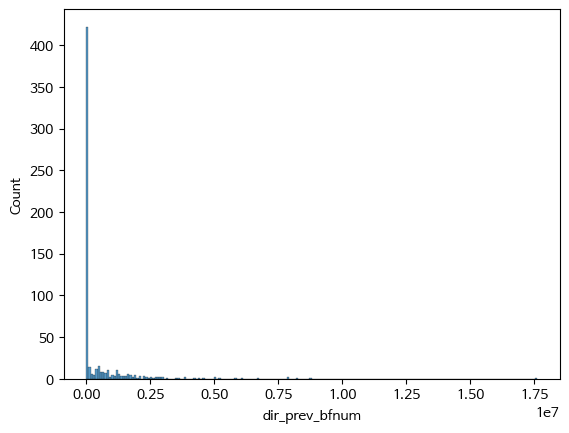

In [ ]:
# dir_prev_bfnum의 histogram
sns.histplot(train['dir_prev_bfnum'])

<Axes: xlabel='box_off_num', ylabel='Count'>

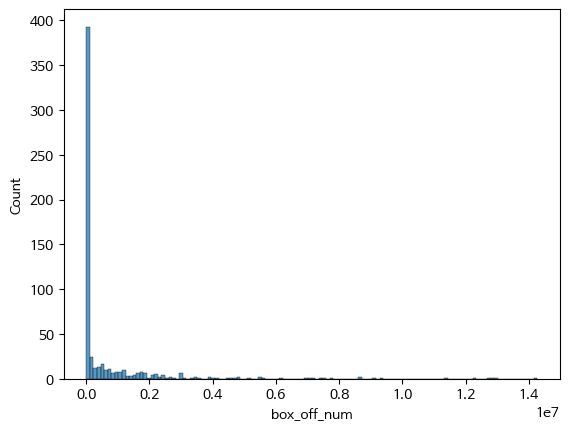

In [ ]:
# box_off_num의 histogram
sns.histplot(train['box_off_num'])

### **2. 두 변수의 산점도 그리기**
- 이전 영화 평균 관객 수는 0.0 ~ 0.25 사이에 몰려 있다.
- 현재 영화 관객 수는 0.0 ~ 0.4 사이에 몰려 있다.
- **두 변수 사이 관계를 보기가 어렵다.**

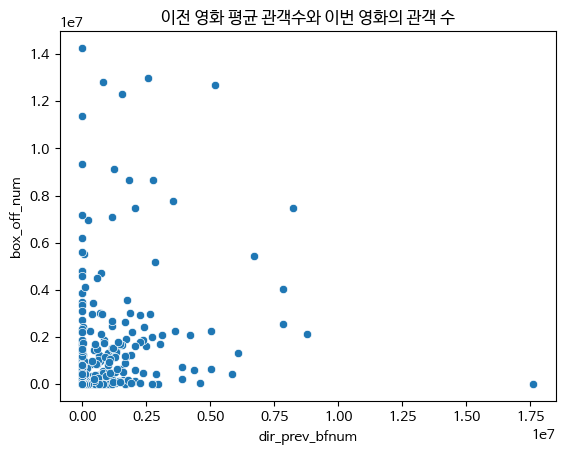

In [ ]:
# dir_prev_bfnum과 box_off_num의 산점도
sns.scatterplot(x='dir_prev_bfnum', y='box_off_num', data=train)
plt.title('이전 영화 평균 관객수와 이번 영화의 관객 수')
plt.show()

### **3. 로그 변환해서 산점도 + 회귀선 그리기**

- **상관관계**
   - 선 그래프가 양의 기울기로 산점도들의 경향을 나타낸다.
   - 오른쪽에 점이 몰려있는 것을 보아, 이전 영화 평균 관객수가 높은 경우에 현재 영화 관객수가 높다는 것을 알 수 있다.  
- **이상점**
   - 이전 영화의 평균 관객수가 0 인 경우 다수 존재 -> 이전의 작품이 없는 경우이다. 그럼에도 불구하고 현재 관객 수가 매우 다양하게 분포한다.
   - 이전 영화의 평균 관객 수가 매우 큰 경우임에도 현재 영화의 관객 수 가 매우 낮은 경우 존재한다. (왼쪽 끝 아래)
- **가설 타당성**
   - 전체적으로 양의 상관관계를 가지므로 이전 영화의 평균 관객수가 많을수록 현재 관객수가 많다는 가설을 뒷받침한다.


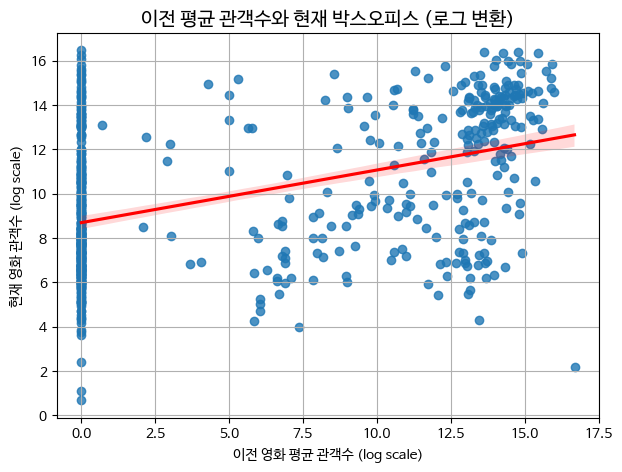

In [ ]:
train["box_log"] = np.log1p(train["box_off_num"])
train["dir_prev_log"] = np.log1p(train["dir_prev_bfnum"])

plt.figure(figsize=(7,5))
sns.regplot(x="dir_prev_log", y="box_log", data=train, line_kws={'color':'red'})
plt.title("이전 평균 관객수와 현재 박스오피스 (로그 변환)", fontsize=14)
plt.xlabel("이전 영화 평균 관객수 (log scale)")
plt.ylabel("현재 영화 관객수 (log scale)")
plt.grid(True)
plt.show()

### **4. Q3을 기준으로 두 집단으로 나눠 확인하기**

- **상관관계 차이 비교**
   - 이전 평균 관객수가 3사분위 미만인 경우는 3사분위 이상인 경우(많은 관객들이 찾은 영화)보다 현재 관객 수와 낮은 양의 상관관계를 보인다.
- **이상점**
   - 왼쪽 그래프는 선 그래프로부터 떨어진 이상점들이 많이 보인다. 즉 상관 관계를 크게 갖지 않는다. 또한 이전 관객수가 적었더라도 현재 관객 수가 매우 높은 경우도 발견된다.
   - 오른쪽 그래프는 선 그래프 위쪽에 점들이 다수 분포한 것으로 보아 이전 평균 관객수가 클수록 두 변수가 양의 상관관계를 가진다는 것을 알 수 있다.
- **가설 타당성**
   - 이전 평균 관객수 크기에 따라 상관관계가 다르기 때문에 항상 가설이 타당하다고 보기는 어렵다.

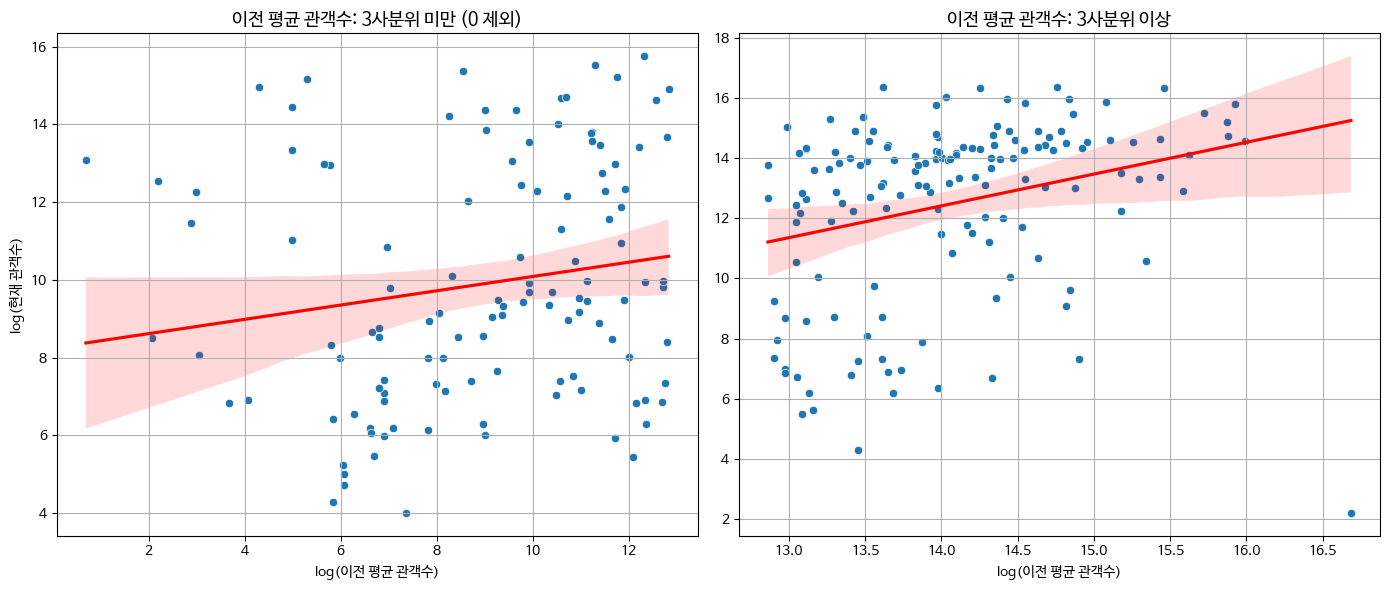

In [ ]:
# 사분위수 구하기
q3 = train["dir_prev_bfnum"].quantile(0.75)

# 두 집단 나누기
low_group = train[(train["dir_prev_bfnum"] > 0) & (train["dir_prev_bfnum"] < q3)].copy()
high_group = train[train["dir_prev_bfnum"] >= q3].copy()

# 로그 변환 (왜곡 줄이기)
low_group["box_log"] = np.log1p(low_group["box_off_num"])
low_group["dir_prev_log"] = np.log1p(low_group["dir_prev_bfnum"])
high_group["box_log"] = np.log1p(high_group["box_off_num"])
high_group["dir_prev_log"] = np.log1p(high_group["dir_prev_bfnum"])

# 2개의 그래프 나란히 그리기
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# 3사분위 미만
sns.scatterplot(x="dir_prev_log", y="box_log", data=low_group, ax=axes[0])
sns.regplot(x="dir_prev_log", y="box_log", data=low_group, ax=axes[0], scatter=False, color="red")
axes[0].set_title("이전 평균 관객수: 3사분위 미만 (0 제외)", fontsize=13)
axes[0].set_xlabel("log(이전 평균 관객수)")
axes[0].set_ylabel("log(현재 관객수)")
axes[0].grid(True)

# 3사분위 이상
sns.scatterplot(x="dir_prev_log", y="box_log", data=high_group, ax=axes[1])
sns.regplot(x="dir_prev_log", y="box_log", data=high_group, ax=axes[1], scatter=False, color="red")
axes[1].set_title("이전 평균 관객수: 3사분위 이상", fontsize=13)
axes[1].set_xlabel("log(이전 평균 관객수)")
axes[1].set_ylabel("")

axes[1].grid(True)

plt.tight_layout()
plt.show()

### **5. 이전 평균 관객 수를 구간으로 나누어 현재 관객 수의 분포 확인**
- **중앙값 비교**
   - 이전 평균 관객수가 1만 이하인 경우 가장 낮은 중앙값 분포를 보였다. 즉, 이전 관객수가 낮을수록 현재 관객수가 낮다는 것을 알 수 있다.
   - 1만~50만의 평균 관객수 구간의 경우 비슷한 중앙값 분포를 가진다.
   - 50만 이상의 경우, 특히 100만이 넘어갈수록 중앙값이 매우 커진다. 즉, 감독의 이전 영화들을 많은 관객들이 봤다면 현재 영화의 관객수도 많다.
- **이상점**
   - 100만 이상 구간에서 이상점을 발견할 수 있다. 즉 이전 영화의 평균 관객수가 매우 높았어도 현재 관객수가 낮은 경우이다.
- **가설 타당성**
   - 이전 평균 관객수가 50만 이상의 높은 경우일수록 현재 관객수에 높은 영향을 끼치는 것을 알 수 있다. 그러나 모든 구간에서 양적 관계를 갖는다고 보긴 어렵다.

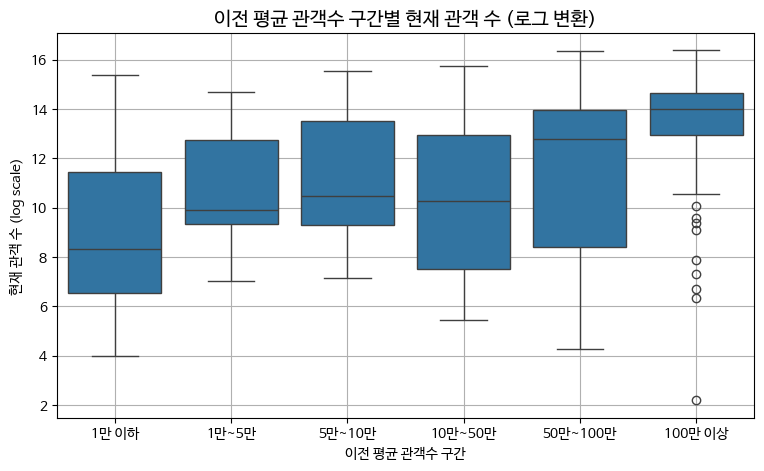

In [ ]:
bins = [0, 1e4, 5e4, 1e5, 5e5, 1e6, train["dir_prev_bfnum"].max()]
labels = ["1만 이하","1만~5만","5만~10만","10만~50만","50만~100만","100만 이상"]
train["dir_prev_bin"] = pd.cut(train["dir_prev_bfnum"], bins=bins, labels=labels)

plt.figure(figsize=(9,5))
sns.boxplot(x="dir_prev_bin", y="box_log", data=train)
plt.title("이전 평균 관객수 구간별 현재 관객 수 (로그 변환)", fontsize=14)
plt.xlabel("이전 평균 관객수 구간")
plt.ylabel("현재 관객 수 (log scale)")
plt.grid(True)
plt.show()

### **6. 단순선형 회귀로 이전 평균 관객수가 현재 관객 수에 미치는 영향 분석**

**< R-squared >** 값 = 0.2

    -> dir_prev_log(이전 영화 평균 관객수 로그변환) 이 box_log(현재 영화 관객수 로그변환)의 변동성을 20% 설명가능하다.
    -> 나머지 80%의 변동성은 다른 요인들에 의해 결정된다.

**< P-value >** 값 = 0.000
    
    -> 0.05보다 작기 때문에 이전 영화 관객수가 현재 관객수에 미치는 영향이 유의미하다.

**< 회귀계수 >** dir_prev_log의 계수 : 0.2372
    
    -> 이전 평균 관객 수가 1%이 증가할때 현재 관객 수가 약 0.23% 증가한다.

### **7. 최종 결론**

이전 평균 관객수와 현재 관객수 사이에 양의 상관관계가 있고 통계적으로 유의미하지만, R-squared 값이 작고 단위당 증가율이 낮기 때문에 이전 평균 관객수가 큰 영향력을 갖는다고 보기 어렵다. 가설 기각.


In [ ]:
import statsmodels.api as sm
X = train["dir_prev_log"]
y = train["box_log"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                box_log   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     149.8
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           6.82e-31
Time:                        08:43:53   Log-Likelihood:                -1502.9
No. Observations:                 600   AIC:                             3010.
Df Residuals:                     598   BIC:                             3019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.6933      0.159     54.708   

## 3-2. 개봉일과 상영하는 장르가 서로 영향이 있을 것이다.
- 변수: 개봉일(**release_time**), 장르(**genre**)

### **1. 각각의 histogram 그리기**
- 달 별로 영화 개수를 살펴보니 연말에 개봉하는 영화 수가 다른 수에 비해 2배 이상으로 많다.
- 영화의 장르는 드라마가 타 장르에 비해 2배 이상으로 많고 다큐멘터리, 멜로랑 로맨스가 그 다음으로 많다.

In [ ]:
train["month"] = train["release_time"].dt.month
train.month.value_counts().sort_index()

,count
month,
1,39
2,31
3,52
4,47
5,57
6,29
7,49
8,55
9,60


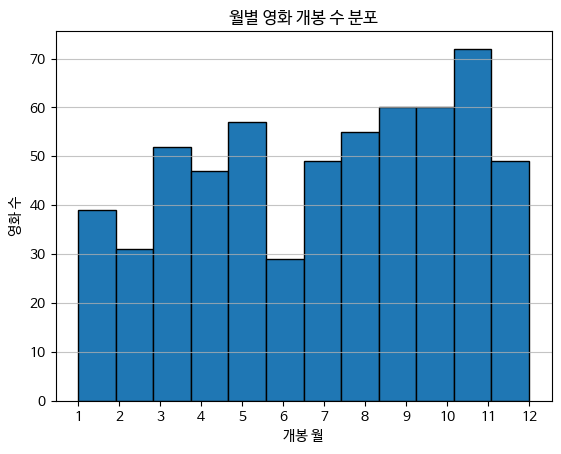

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train['month'], bins=12, edgecolor='black')
plt.title('월별 영화 개봉 수 분포')
plt.xlabel('개봉 월')
plt.ylabel('영화 수')
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.75)
plt.show()

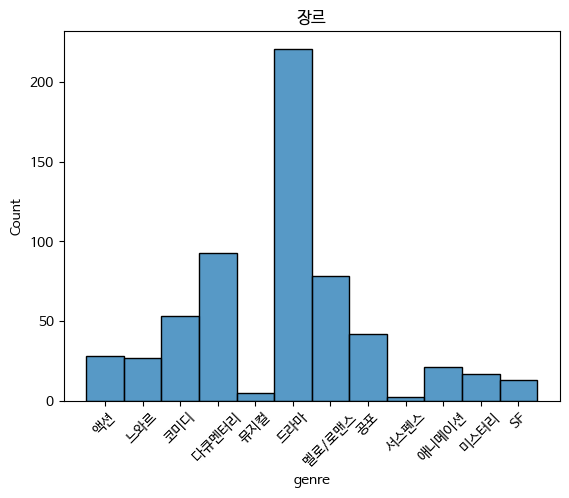

In [ ]:
sns.histplot(train["genre"])
plt.title("장르")
plt.xticks(rotation=45)
plt.show()

### **2. 장르별 월별 개봉 편수를 히트맵으로 그리기**
- **그래프 해석**
   - 전체적으로 드라마 장르의 비율이 높으며 드라마 장르는 5월, 9월, 11월에 많이 개봉한다.
   - 공포 장르는 8월에 상대적으로 많이 개봉한다.
   - 멜로. 로맨스 장르는 3월, 10월에 상대적으로 개봉 비율이 높다.
   - 코미디 장르는 1월과 5월에 상대적으로 개봉 비율이 높다.
- **가설 타당성**
   - 장르마다 월별로 개봉 빈도가 높은 경우가 있다. (공포, 멜로 로맨스, 드라마) 하지만 모든 장르가 개봉일에 따라 영향을 받는 것은 아니므로 항상 가설이 타당하다고 보기 어렵다.

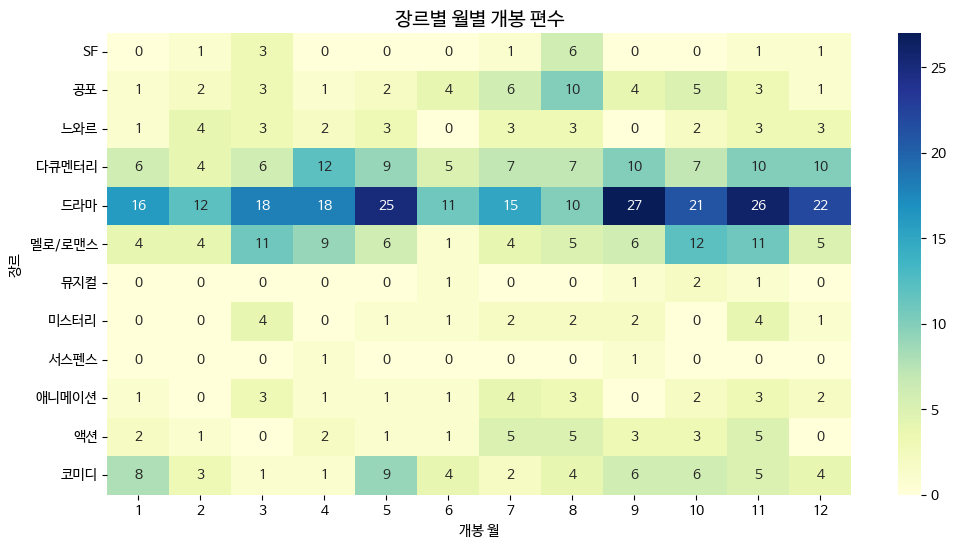

In [ ]:
genre_month = pd.crosstab(train["genre"], train["month"])

plt.figure(figsize=(12,6))
sns.heatmap(genre_month, cmap="YlGnBu", annot=True, fmt="d")
plt.title("장르별 월별 개봉 편수", fontsize=14)
plt.xlabel("개봉 월")
plt.ylabel("장르")
plt.show()

### **3. 해마다 개봉하는 장르의 빈도 변화 확인**
- **그래프 해석**
   - 전체적으로 2014년도에 개봉하는 영화 수가 많았고, 특히 드라마, 멜로와 다큐멘터리 장르 수가 다른 해에 비해 많았다.
   - 코미디 장르는 2011, 2013년에 개봉한 수가 다른 해에 비해 적다.
   - 2015년도에는 개봉한 멜로. 로맨스 장르 수가 다큐멘터리 장르 수를 넘었다.
- **가설 타당성**
   - 해마다 특히 더 개봉하는 장르가 있긴 하지만(코미디) 해에 따라 특정 장르보단 전체적으로 영화의 개봉 수가 늘어나는 영향이 더 크다. 가설을 뒷받침하지 못한다고 볼 수 있다.

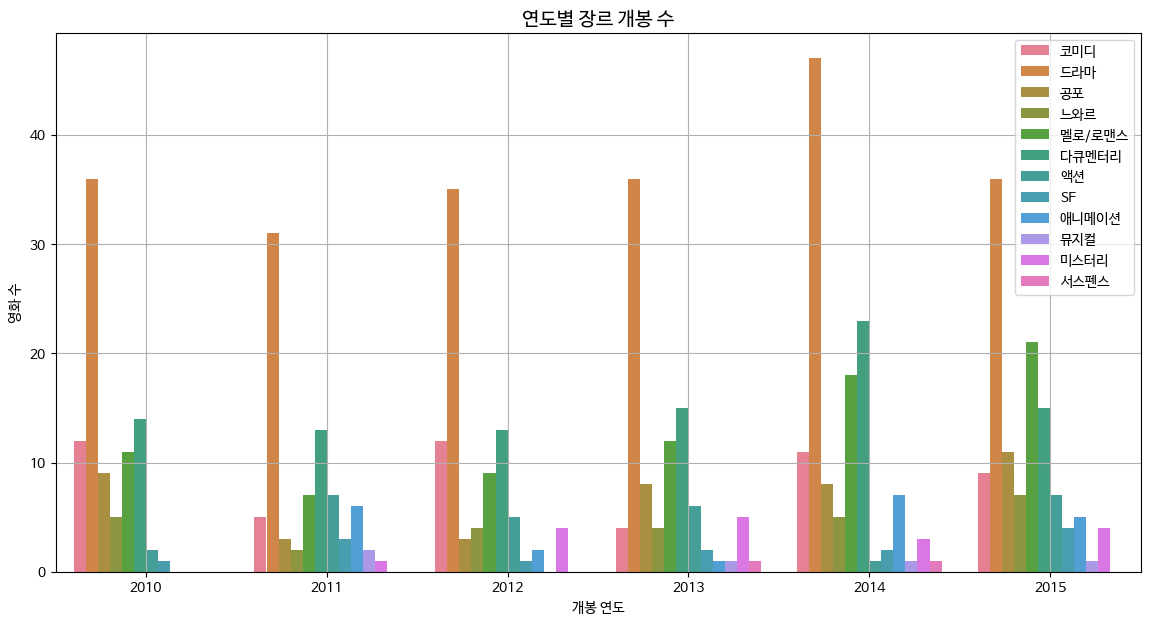

In [ ]:
train["year"] = train["release_time"].dt.year

plt.figure(figsize=(14,7))
sns.countplot(x="year", hue="genre", data=train)
plt.title("연도별 장르 개봉 수", fontsize=14)
plt.xlabel("개봉 연도")
plt.ylabel("영화 수")
plt.legend(bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

### **4. 히트맵을 이용해 년도별 장르의 빈도율 살펴보기**
- **그래프 해석**
   - 2014년에 다큐, 드라마, 멜로 세 장르의 빈도가 높아졌다.
   - 멜로는 2015년에도 높은 빈도를 나타냈다.
   - 2012년에 상대적으로 적은 수의 영화가 개봉했다.
- **가설 타당성**
   - 개봉하는 해에 따라서 영화 장르에 영향을 미친다고 보기는 어렵다.

year
2010     90
2011     80
2012     88
2013     95
2014    127
2015    120
Name: title, dtype: int64


<Axes: title={'center': '연도별 영화 개봉 수'}, xlabel='year'>

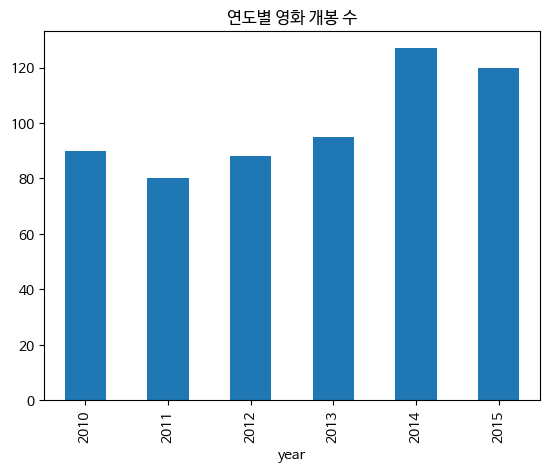

In [ ]:
#연도별 영화 개봉 수 확인
year_count = train.groupby("year")["title"].count()
print(year_count)
year_count.plot(kind="bar", title="연도별 영화 개봉 수")

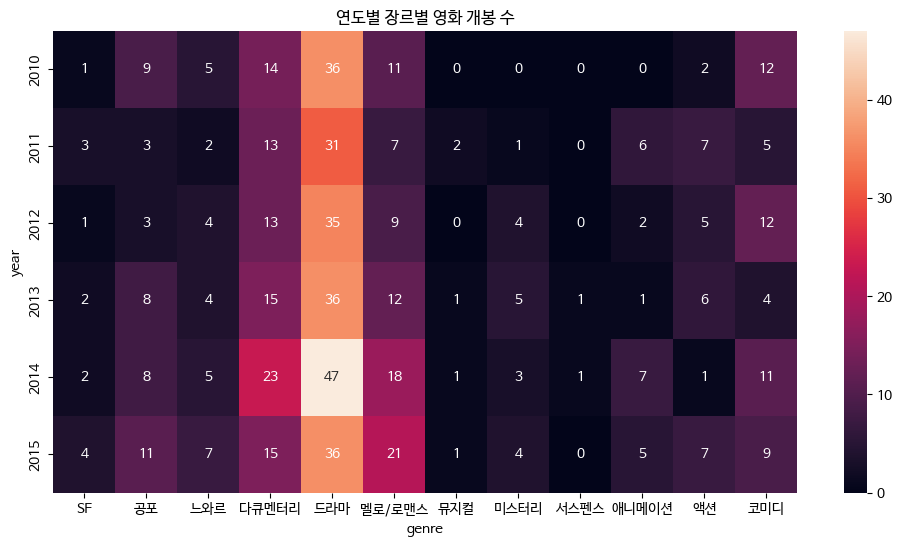

In [ ]:
#2014년도에 개봉한 영화의 장르
genre_by_year = train.groupby(["year", "genre"])["title"].count().reset_index()
genre_2014 = genre_by_year[genre_by_year["year"] == 2014]

plt.figure(figsize=(12,6))
genre_pivot = genre_by_year.pivot(index="year", columns="genre", values="title").fillna(0)
sns.heatmap(genre_pivot, annot=True, fmt=".0f")
plt.title("연도별 장르별 영화 개봉 수")
plt.show()

### **5. 특정 장르별 월별 개봉 빈도 수**

- **그래프 해석**
   - 공포 영화는 상대적으로 여름 시즌(8월)에 개봉하는 수가 많다.
   - 드라마 장르는 5, 9, 11월에 개봉하는 수가 많다. 이를 통해 가정의 달인 5월과 연말 시즌에 가족단위의 관객을 대상으로 하거나 드라마 장르와 어울리는 시기에 개봉을 한다고 해석할 수 있다.
   - 멜로.로맨스 장르는 3, 10, 11월에 개봉하는 수가 많다. 이를 통해 봄 시즌과 연말 시즌을 대상으로 개봉한다고 해석할 수 있다.
- **가설 타당성**
   - 달 별로 공포, 드라마, 멜로 장르의 영화 개봉수가 변화하고 특정 달에 어울리는 장르의 영화를 더 많이 개봉한다는 것을 알 수 있다. 그러므로 위 장르들은 가설에 타당한 뒷받침이 된다.

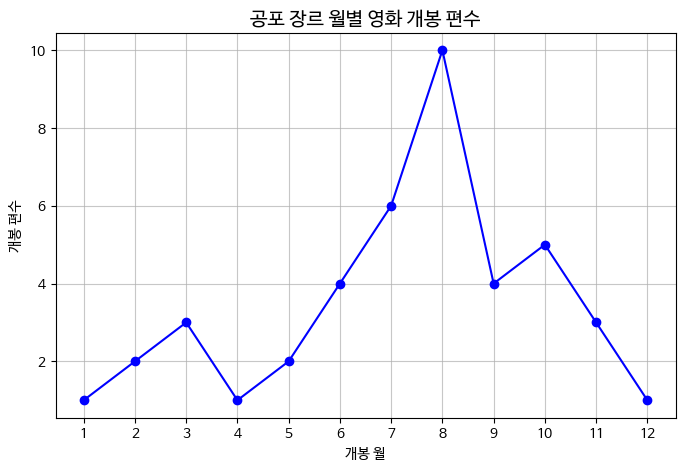

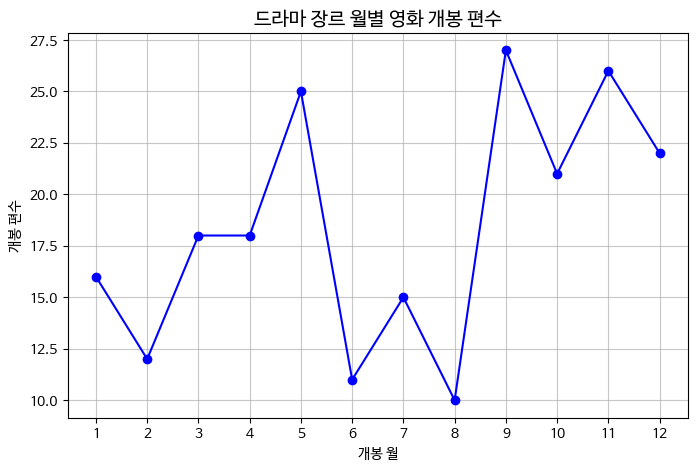

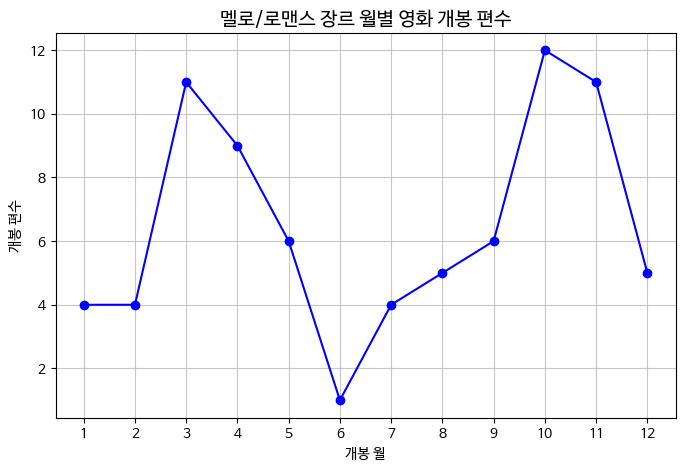

In [ ]:
genres = ["공포", "드라마", "멜로/로맨스"]

for g in genres:
    subset = train[train["genre"] == g]
    month_count = subset.groupby("month")["title"].count().reset_index()

    plt.figure(figsize=(8,5))
    plt.plot(month_count["month"], month_count["title"], marker="o", color="blue")
    plt.title(f"{g} 장르 월별 영화 개봉 편수", fontsize=14)
    plt.xlabel("개봉 월")
    plt.ylabel("개봉 편수")
    plt.xticks(range(1,13))
    plt.grid(True, alpha=0.7)
    plt.show()

## 3-3. 주연 배우 수에 따라 스태프 수에 영향이 있을 것이다.
- 변수: 주연 배우 수(**num_actor**), 스태프 수(**num_staff**)

### **1. 스태프 수에 대한 주연 배우 수 산점도 그리기**

- **그래프 해석**
   - 대부분의 영화는 스태프 수가 0~300명 사이에 몰려 있다.
   - 대부분의 영화는 주연 배우 수가 1~5명에 집중되어 있다.
   - 회귀선이 거의 수평에 가까운 것으로 볼 때 스태프 수가 많아진다고 해서 주연 배우 수가 크게 늘어나지는 않는 것으로 보인다.

Text(0, 0.5, '주연배우 수')

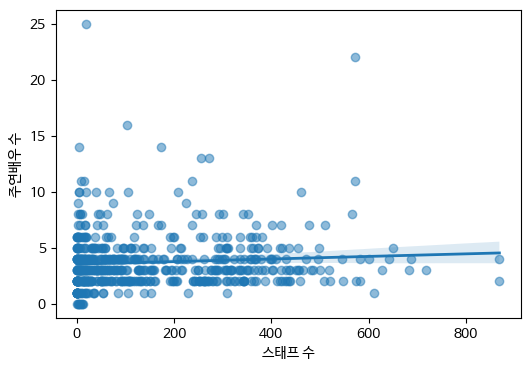

In [ ]:
x,y='num_staff','num_actor'
# 산점도+회귀선
fig,ax=plt.subplots(figsize=(6,4))
sns.regplot(data=train,x=x,y=y,scatter_kws={'alpha':0.5},line_kws={'linewidth':2},ax=ax)
plt.xlabel("스태프 수")
plt.ylabel("주연배우 수")

### **2. 주연 배우 수의 범위를 0 ~ 5명으로 한정해 상자그림 그리기**

- **그래프 해석**
   - 주연 배우가 0명일 때와 1명일 때, 2 ~ 5명일 때의 스태프 수는 차이가 있다.
   - 주연 배우가 0명일 때는 스태프가 거의 필요하지 않다.
   - 주연 배우가 1명일 때는 2 ~ 5명일 때에 비해 스태프가 많이 필요하지 않다. 때때로 스태프가 많이 필요한 영화도 존재한다.(이상점) 2 ~ 5명일 때보다 스태프 수의 중앙값이 낮게 잡힌다.
   - 주연 배우가 2 ~ 5명일 때의 상자 그림은 거의 유사하게 나타난다. 스태프의 수는 100명 이내에서 중앙값이 잡힌다.
- **이상점**
   - 주연 배우 수가 1일 때 나타나는 이상점: 주연 배우 수보다 조연 배우의 수가 많을 경우(ex. 대호) 스태프가 많이 필요할 수도 있다.
- **가설 타당성**
   - 주연 배우의 수가 매우 적을 경우(0, 1명)를 제외한다면 주연 배우의 수와 관련 없이 스태프의 수는 비슷하게 요구된다. 이 스태프의 수는 주연 배우의 수보다는 조연 배우의 수와 같이 다른 요인에 영향을 받을 것이다.
   - 주연 배우의 수가 매우 적을 경우에는 독립 영화나 다큐멘터리의 개수가 많아 스태프가 많이 필요없을 것으로 보인다.

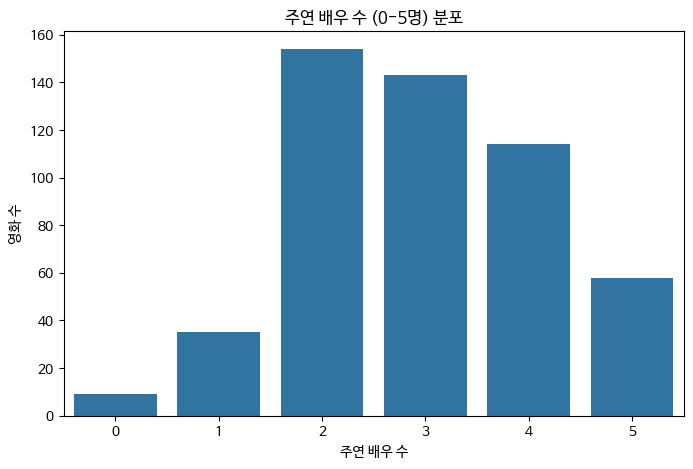

In [ ]:
# 주연 배우 수가 0~5인 범위
train_actor05=train[(train.num_actor>=0) & (train.num_actor<=5)].copy()

plt.figure(figsize=(8, 5))
sns.countplot(x='num_actor',data=train_actor05)
plt.title('주연 배우 수 (0-5명) 분포')
plt.xlabel('주연 배우 수')
plt.ylabel('영화 수')
plt.show()

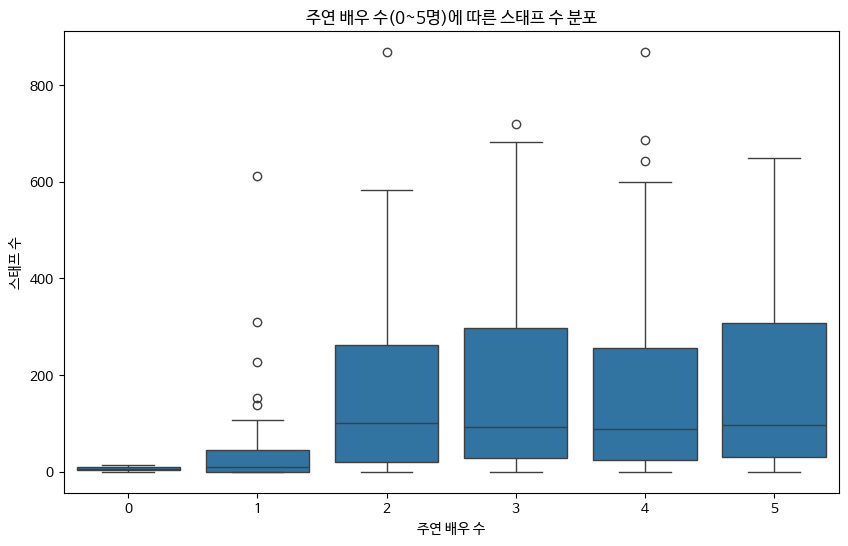

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='num_actor',y='num_staff',data=train_actor05)
plt.title('주연 배우 수(0~5명)에 따른 스태프 수 분포')
plt.xlabel('주연 배우 수')
plt.ylabel('스태프 수')
plt.show()

In [ ]:
train_actor0=train_actor05[train_actor05.num_actor==0]
train_actor0

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,box_log,dir_prev_log,dir_prev_bin,month,year
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,0.0,0,6,0,652,6.481577,0.0,NaN,7,2012
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,0.0,0,11,0,10942,9.300455,0.0,NaN,3,2013
168,망대,골든타이드픽처스,다큐멘터리,2015-03-12,66,전체 관람가,문승욱,0.0,0,13,0,65,4.189655,0.0,NaN,3,2015
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,0.0,0,0,0,862,6.760415,0.0,NaN,10,2015
391,명령불복종 교사,인디플러그,다큐멘터리,2015-05-14,96,전체 관람가,서동일,0.0,0,3,0,1827,7.510978,0.0,NaN,5,2015
418,오월愛,상구네 필름,다큐멘터리,2011-05-12,104,전체 관람가,김태일,0.0,0,4,0,4092,8.317033,0.0,NaN,5,2011
425,보라,시네마달,다큐멘터리,2011-11-24,136,전체 관람가,이강현,0.0,0,7,0,389,5.966147,0.0,NaN,11,2011
437,나쁜 나라,(주)시네마달,다큐멘터리,2015-12-03,120,12세 관람가,김진열,0.0,0,2,0,21576,9.979383,0.0,NaN,12,2015
456,"60년전, 사선에서",인터콘미디어,다큐멘터리,2010-06-24,63,전체 관람가,박성미,0.0,0,10,0,79,4.382027,0.0,NaN,6,2010


In [ ]:
# 주연 배우 수 1명인 것들 중 스태프의 수가 100을 넘는 것: 이상점
train_actor1=train_actor05[train_actor05.num_actor==1]
train_actor1[train_actor1.num_staff>100]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,box_log,dir_prev_log,dir_prev_bin,month,year
14,철가방 우수氏,CJ E&M 영화부문,드라마,2012-11-22,100,12세 관람가,윤학렬,0.000000e+00,0,152,1,92404,11.433936,0.000000,NaN,11,2012
21,성실한 나라의 앨리스,CGV아트하우스,드라마,2015-08-13,90,청소년 관람불가,안국진,0.000000e+00,0,228,1,44074,10.693648,0.000000,NaN,8,2015
99,신이 보낸 사람,(주)마운틴픽쳐스,드라마,2014-02-13,112,15세 관람가,김진무,0.000000e+00,0,138,1,424778,12.959324,0.000000,NaN,2,2014
143,시선,나이너스엔터테인먼트(주),드라마,2014-04-16,89,12세 관람가,이장호,1.464557e+05,3,106,1,12950,9.468928,11.894485,10만~50만,4,2014
353,시,(주)NEW,드라마,2010-05-13,139,15세 관람가,이창동,9.943000e+04,1,310,1,218898,12.296366,11.507219,5만~10만,5,2010
487,대호,(주)NEW,드라마,2015-12-16,139,12세 관람가,박훈정,2.270048e+06,2,612,1,1762733,14.382377,14.635312,100만 이상,12,2015


## 3-4. 상영 시간은 박스 오피스 수에 영향을 줄 것이다.
- 변수: 상영 시간(**time**), 박스 오피스 수(**box_off_num**)

### **1. 상영 시간에 대해 histogram 그리기**
- **그래프 해석**
   - 영화가 대부분 80 ~ 120분의 상영 시간을 가진다.
   - 50분 이하, 150분 이상인 영화는 수가 많지 않다.

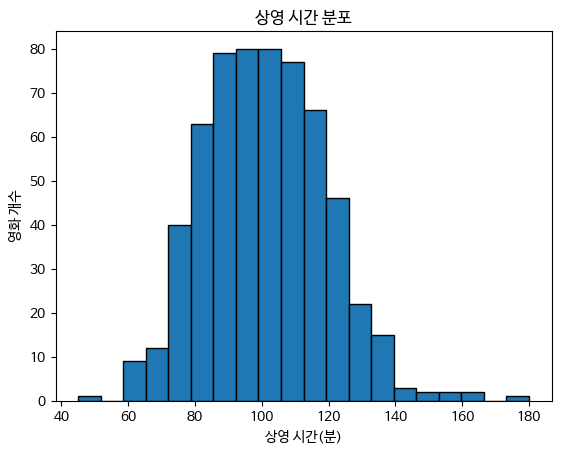

In [ ]:
plt.hist(train.time,bins=20,edgecolor='black')
plt.xlabel("상영 시간(분)")
plt.ylabel("영화 개수")
plt.title("상영 시간 분포")
plt.show()

### **2. 상영 시간에 대한 박스 오피스 수를 산점도로 그리기**

- 그래프 해석
   - 박스 오피스 수가 작은 영화들은 상영 시간의 전 범위에 깔려 있다.
   - 박스 오피스 수가 크게 나타나는 영화들은 상영 시간 120 ~ 140분에 주로 있다.

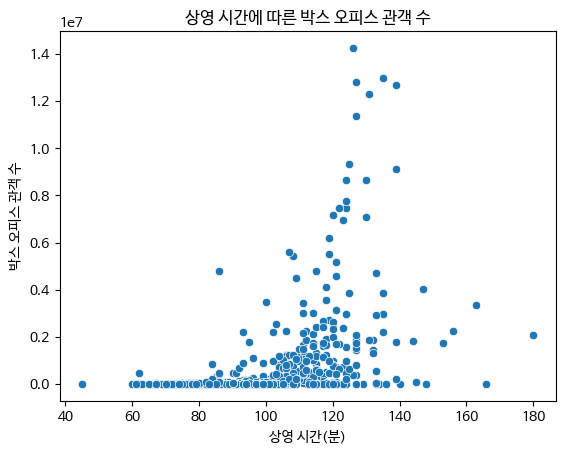

In [ ]:
sns.scatterplot(x='time',y='box_off_num',data=train)
plt.xlabel("상영 시간(분)")
plt.ylabel("박스 오피스 관객 수")
plt.title("상영 시간에 따른 박스 오피스 관객 수")
plt.show()

### **3. 80 ~ 140 안의 데이터만 추출해 간격을 나눠서 비교**

- 그래프 해석
   - box_off_num이 상대적으로 매우 큰 영화들은 120 ~ 140분에서 나온다.
   - 120 ~ 129분과 130 ~ 140분의 관객수의 중앙값과 평균값은 다른 시간 간격에 비해 차이가 많이 난다. box_off_num이 비슷하게 나타나는 80 ~ 119분과 달리 120 ~ 140분에서는 box_off_num이 큰 영화들이 많다.
- 가설 타당성: **상영 시간이 증가할 때 박스 오피스의 평균 관객 수가 증가하기는 하지만 특정 상영 시간에 대한 지표로는 보기 힘들다.**

In [ ]:
train_time80140=train[train.time.between(80,140)]
train_time8090=train[train.time.between(80,89)]
train_time90100=train[train.time.between(90,99)]
train_time100110=train[train.time.between(100,109)]
train_time110120=train[train.time.between(110,119)]
train_time120130=train[train.time.between(120,129)]
train_time130140=train[train.time.between(130,140)]

In [ ]:
mean_box8090=train_time8090.box_off_num.mean()
median_box8090=train_time8090.box_off_num.median()

mean_box90100=train_time90100.box_off_num.mean()
median_box90100=train_time90100.box_off_num.median()

mean_box100110=train_time100110.box_off_num.mean()
median_box100110=train_time100110.box_off_num.median()

mean_box110120=train_time110120.box_off_num.mean()
median_box110120=train_time110120.box_off_num.median()

mean_box120130=train_time120130.box_off_num.mean()
median_box120130=train_time120130.box_off_num.median()

mean_box130140=train_time130140.box_off_num.mean()
median_box130140=train_time130140.box_off_num.median()

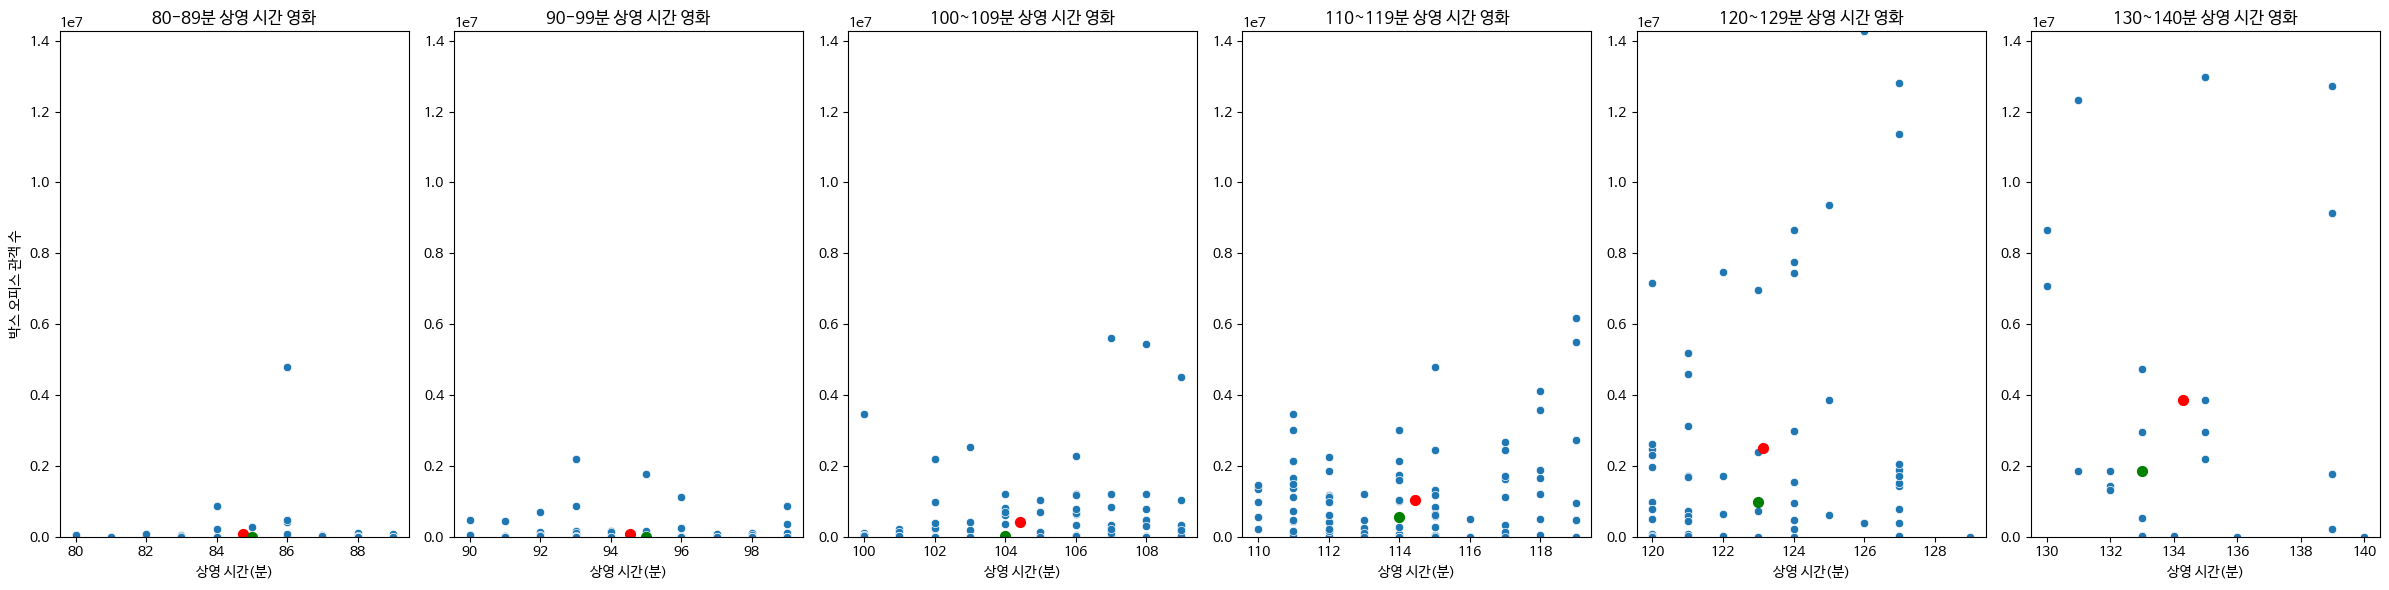

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(24, 6)) # 1행 6열의 서브플롯 생성

max_box_off = train.box_off_num.max()
y_limit = [0, max_box_off]

# 80-89분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time8090, ax=axes[0])
axes[0].scatter(train_time8090.time.mean(),mean_box8090,color='red',s=50) # 빨간점: 평균
axes[0].scatter(train_time8090.time.median(),median_box8090,color='green',s=50) # 초록점: 중앙값
axes[0].set_title('80-89분 상영 시간 영화')
axes[0].set_xlabel("상영 시간(분)")
axes[0].set_ylabel("박스 오피스 관객 수")
axes[0].set_ylim(y_limit)

# 90-99분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time90100, ax=axes[1])
axes[1].scatter(train_time90100.time.mean(),mean_box90100,color='red',s=50,)
axes[1].scatter(train_time90100.time.median(),median_box90100,color='green',s=50)
axes[1].set_title('90-99분 상영 시간 영화')
axes[1].set_xlabel("상영 시간(분)")
axes[1].set_ylim(y_limit)

# 100-109분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time100110, ax=axes[2])
axes[2].scatter(train_time100110.time.mean(),mean_box100110,color='red',s=50,)
axes[2].scatter(train_time100110.time.median(),median_box100110,color='green',s=50)
axes[2].set_title('100~109분 상영 시간 영화')
axes[2].set_xlabel("상영 시간(분)")
axes[2].set_ylim(y_limit)

# 110-119분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time110120, ax=axes[3])
axes[3].scatter(train_time110120.time.mean(),mean_box110120,color='red',s=50,)
axes[3].scatter(train_time110120.time.median(),median_box110120,color='green',s=50)
axes[3].set_title('110~119분 상영 시간 영화')
axes[3].set_xlabel("상영 시간(분)")
axes[3].set_ylim(y_limit)

# 120-129분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time120130, ax=axes[4])
axes[4].scatter(train_time120130.time.mean(),mean_box120130,color='red',s=50,)
axes[4].scatter(train_time120130.time.median(),median_box120130,color='green',s=50)
axes[4].set_title('120~129분 상영 시간 영화')
axes[4].set_xlabel("상영 시간(분)")
axes[4].set_ylim(y_limit)

# 130-140분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time130140, ax=axes[5])
axes[5].scatter(train_time130140.time.mean(),mean_box130140,color='red',s=50,)
axes[5].scatter(train_time130140.time.median(),median_box130140,color='green',s=50)
axes[5].set_title('130~140분 상영 시간 영화')
axes[5].set_xlabel("상영 시간(분)")
axes[5].set_ylim(y_limit)

for i in range(1, len(axes)):
    axes[i].set_ylabel("")

plt.tight_layout() # 그래프 간 간격 조절
plt.show()

Text(0, 0.5, '박스오피스 관객 수')

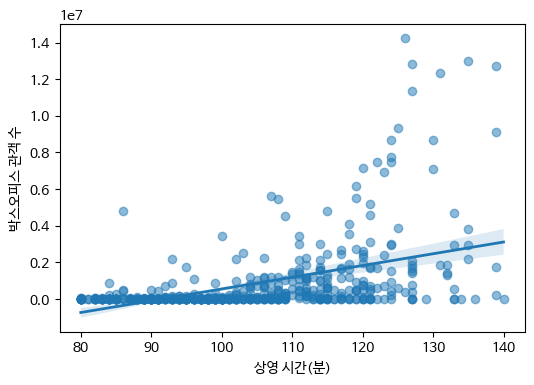

In [ ]:
x,y='time','box_off_num'
# 산점도+회귀선
fig,ax=plt.subplots(figsize=(6,4))
sns.regplot(data=train_time80140,x=x,y=y,scatter_kws={'alpha':0.5},line_kws={'linewidth':2},ax=ax)
plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")

### **4. 어떤 요소가 박스 오피스 수를 크게 했는지(장르/배급사/상영 등급)**

- **장르별**
   - 상위 15개의 영화에서 보이는 장르: 드라마 5 / 코미디 3 / 느와르 2 / 액션 3 / SF 2
   - 다큐멘터리, 멜로/로맨스, 공포, 서스펜스, 미스터리와 같이 호불호가 많이 갈리는 장르는 상위 15개에 존재하지 않는다.
   - **큰 호불호 없이 볼 수 있는 장르에 대한 박스 오피스 수가 큰 것으로 보인다.**

- **배급사별**
   - 상위 15개의 영화에서 보이는 배급사: CJ 엔터테인먼트 6 / (주) 쇼박스 4 / (주) New 2 / 롯데엔터테인먼트 2 / CJ E&M Pictures 1
   - 대체로 **대형 배급사의 영화들이 박스 오피스 관객 수가 크다.**

- **상영등급별**
   - 박스 오피스 수가 큰 것들은 12세 관람가와 15세 관람가가 많다.
   - 전체 관람가는 매우 적은 수이다.
   - **12세 관람가와 15세 관람가가 많으며 이는 장르별에 따른 것처럼 큰 호불호 없이 볼 수 있는 것들이 많이 있기 때문으로 보인다.**
   - 청불의 경우에는 공포나 고어, 성인가의 로맨스 영화가 있으며, 전체 관람가의 경우 모두를 위한 영화라기보다는 12세, 15세 영화를 관람하지 못하는 어린이들을 위한 영화나 애니메이션이라 그 이상의 나이대는 잘 관람하지 않는다.

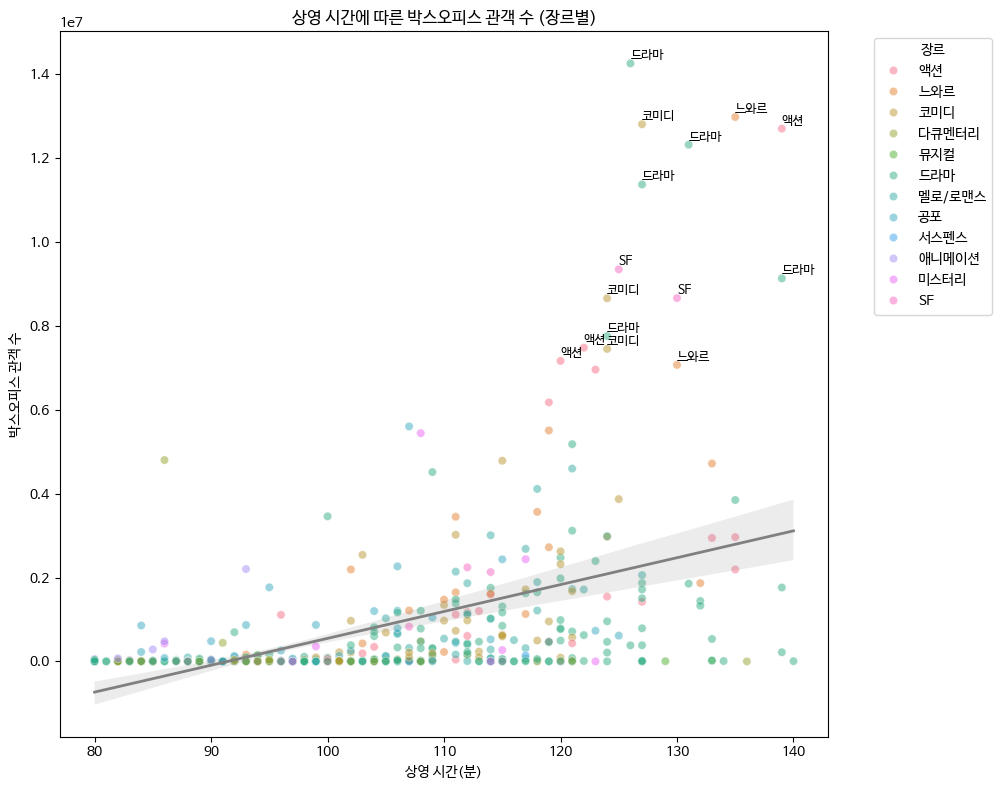

In [ ]:
x,y='time','box_off_num'

fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(data=train_time80140,x=x,y=y,hue='genre',alpha=0.5,ax=ax)
sns.regplot(data=train_time80140,x=x,y=y,scatter=False,line_kws={'linewidth':2},color='gray',ax=ax)

top_15_box_off = train_time80140.nlargest(15, 'box_off_num')
for index, row in top_15_box_off.iterrows():
    plt.text(row['time'], row['box_off_num'], row['genre'], fontsize=9, ha='left', va='bottom')

plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")
plt.title("상영 시간에 따른 박스오피스 관객 수 (장르별)")
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

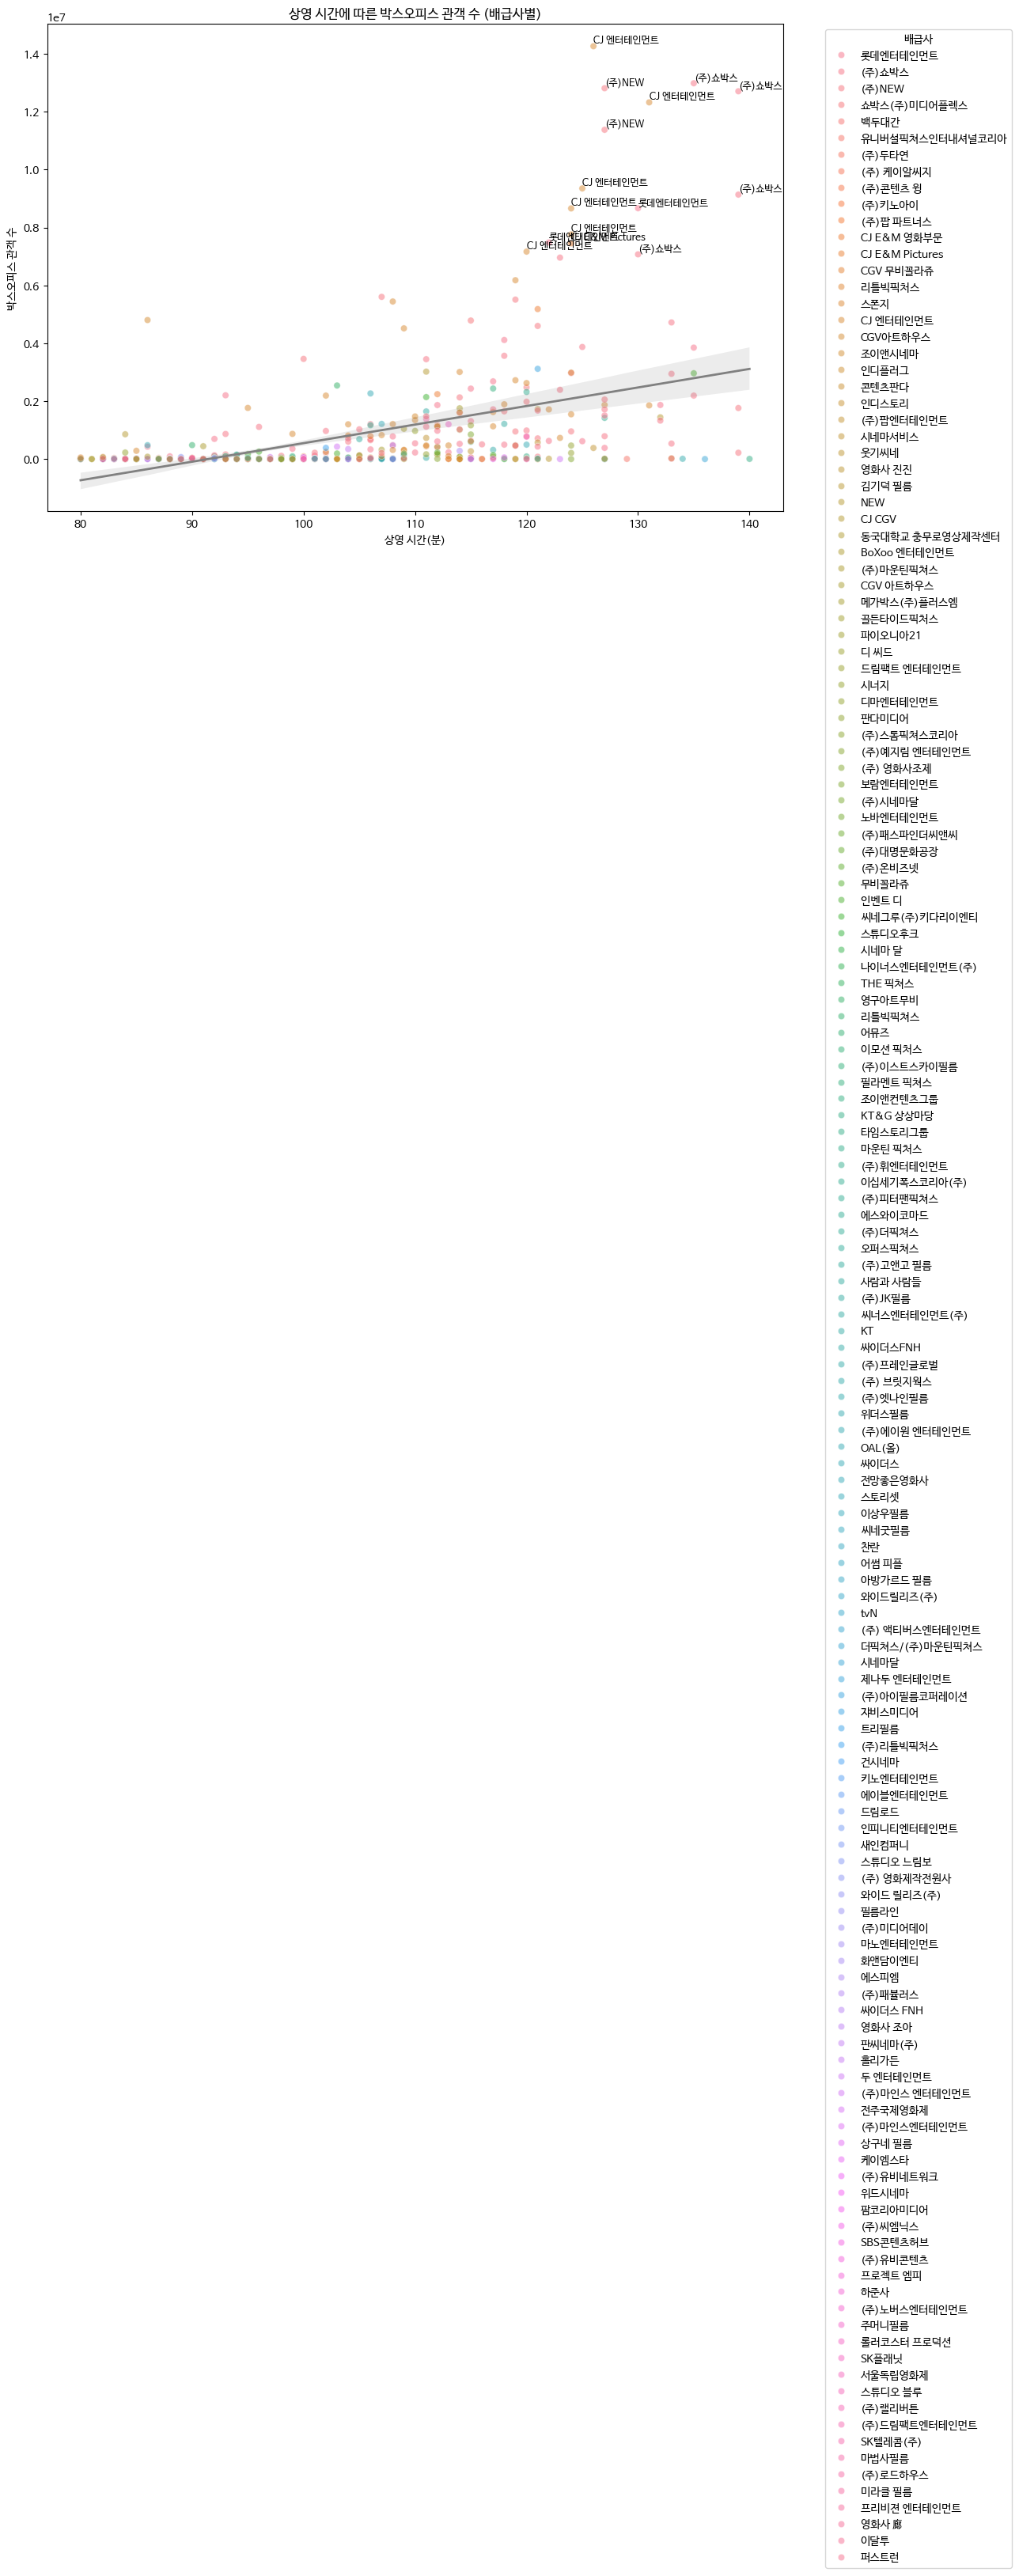

In [ ]:
x,y='time','box_off_num' # 배급사

fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(data=train_time80140,x=x,y=y,hue='distributor',alpha=0.5,ax=ax)
sns.regplot(data=train_time80140,x=x,y=y,scatter=False,line_kws={'linewidth':2},color='gray',ax=ax)

top_15_box_off = train_time80140.nlargest(15, 'box_off_num')
for index, row in top_15_box_off.iterrows():
    plt.text(row['time'], row['box_off_num'], row['distributor'], fontsize=9, ha='left', va='bottom')

plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")
plt.title("상영 시간에 따른 박스오피스 관객 수 (배급사별)")
plt.legend(title='배급사', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

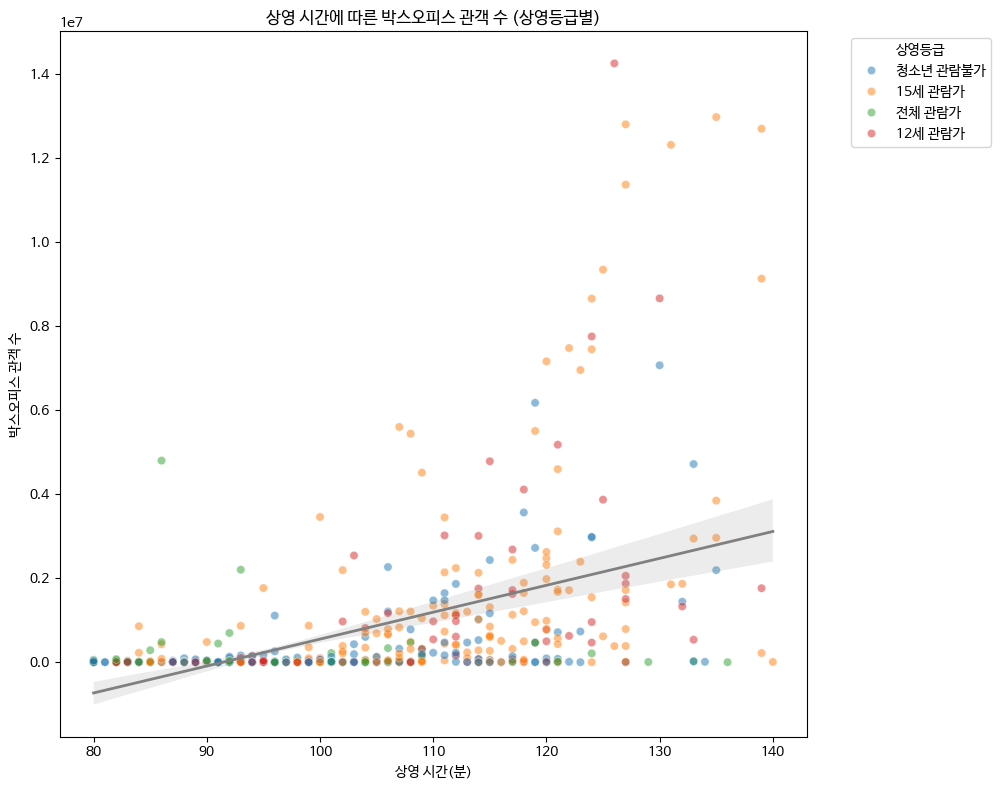

In [ ]:
x,y='time','box_off_num' # 상영 등급

fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(data=train_time80140,x=x,y=y,hue='screening_rat',alpha=0.5,ax=ax)
sns.regplot(data=train_time80140,x=x,y=y,scatter=False,line_kws={'linewidth':2},color='gray',ax=ax)

plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")
plt.title("상영 시간에 따른 박스오피스 관객 수 (상영등급별)")
plt.legend(title='상영등급', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

# **---------**